In [4]:
from plotnine import *
import pandas as pd
from tinydb import TinyDB, Query

db = TinyDB("../results/dev.json")
res = db.all()

In [39]:
df = pd.DataFrame(columns=["sampler", "type", "avg_auc"])
loc = 0
for doc in res:
    df.loc[loc] = (doc["sampler_name"], doc["sampler_name"].split("-")[1].split("|")[0], doc["total_auc"])
    loc += 1

In [40]:
df

,sampler,type,avg_auc
0,name-gnn_explainer||epochs-1000,gnn_explainer,0.496208
1,name-random_walk||p-0.1,random_walk,0.450442
2,name-gnn_explainer||epochs-1000,gnn_explainer,0.433174
3,name-gnn_explainer||epochs-1000,gnn_explainer,0.510505
4,name-gnn_explainer||epochs-1000,gnn_explainer,0.405829
5,name-gnn_explainer||epochs-1000,gnn_explainer,0.420434
6,name-gnn_explainer||epochs-1000,gnn_explainer,0.489583
7,name-gnn_explainer||epochs-1000,gnn_explainer,0.497503
8,name-random_walk||p-0.25,random_walk,0.431872
9,name-normalizing_flows||splines-12||sigmoid-Tr...,normalizing_flows,0.499228


In [41]:
sdf = df.groupby("sampler").max().reset_index()
sdf

,sampler,type,avg_auc
0,name-gnn_explainer||epochs-1000,gnn_explainer,0.532099
1,name-greedy_searcher||edges-6,greedy_searcher,0.447035
2,name-normalizing_flows||splines-12||sigmoid-Tr...,normalizing_flows,0.499228
3,name-random_walk||p-0.1,random_walk,0.450442
4,name-random_walk||p-0.25,random_walk,0.431872
5,name-random_walk||p-0.5,random_walk,0.478906
6,name-spike_slab||theta-0.25||alpha1-1.0||beta1...,spike_slab,0.519343


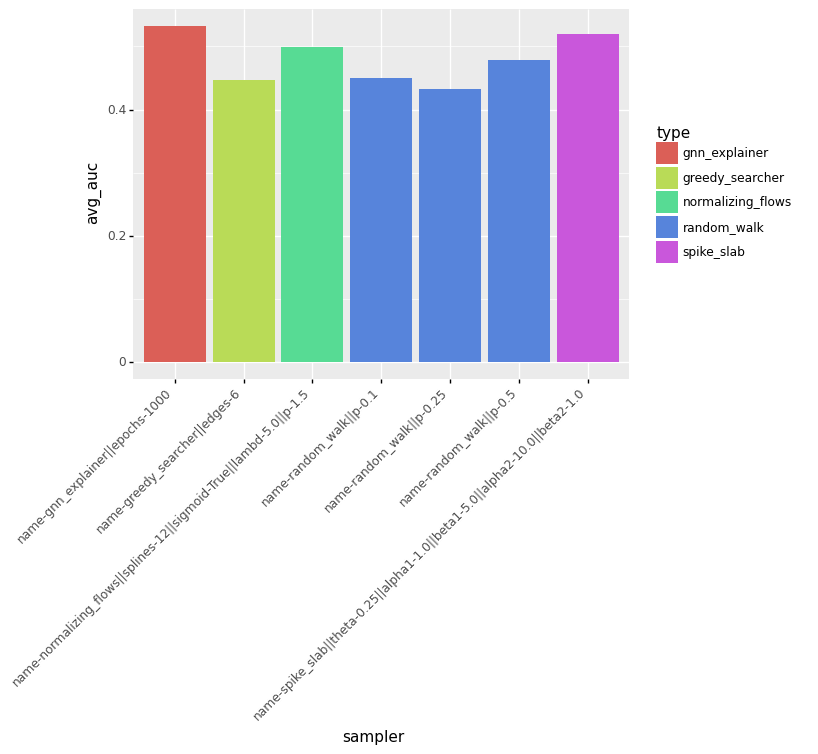

<ggplot: (8790075949508)>

In [42]:
(ggplot(sdf, aes(x="sampler", y="avg_auc", fill="type"))
    + geom_col()
    + theme(axis_text_x=element_text(rotation=45, hjust=1))
)